<a href="https://colab.research.google.com/github/fpant1/introtoaiworksheets/blob/main/ws6_Experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMAT31530 Experimentation

In this notebook we will use the Wisconsin Breast Cancer Prognosis dataset to learn more about how we can fairly conduct machine learning evaluations. 

Information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(Prognostic)).

but some interesting excerpts are below:

"Each record represents follow-up data for one breast cancer case. These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive breast cancer and no evidence of distant metastases at the time of diagnosis."

"Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image."


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer(as_frame=True)
df = bc.frame

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,:-1]
X

In [ ]:
y = df.iloc[:,-1]
y

Let's visualise the frequency of each label a little better. Perhaps the most obvious way to do this is to use a simple bar plot. 

So far we have used matplotlib to produce plots in Python. It's a great library, but there are various higher level abstractions over it that can make certain tasks easier, and produce nicer plots. One such library is 'seaborn'.

In [ ]:
import seaborn as sns
sns.set_style("dark")
sns.countplot(x=y)

Let's do some machine learning to predict whether, given the features calculated from the image, predict if the patient has cancer.

Let's use a simple model, in this case kNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

Oh wow, we have an accuracy of 100% with KNN.




Does that mean that this model will work well with future unseen data?

Let's create a test set, and use that to assess the performance of our model.

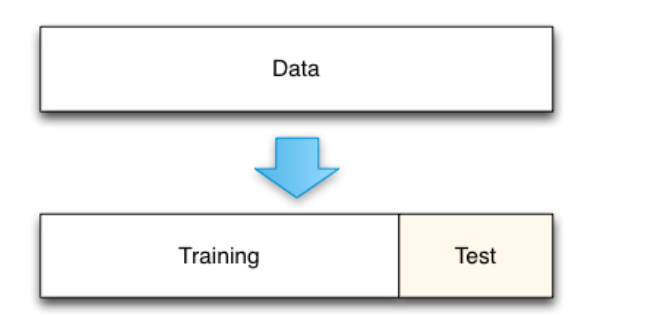

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size=0.66)

model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

OK, perhaps this is more realistic. We used 33% of the data for testing, and as it was never seen by the model it gives us a more reliable estimate of how well our model performs.



What if we wanted to fine tune our model by trying to find the best hyperparameters, say k in knn, in order to improve the performance.

### Task: write code that tries values of k between 1 and 50 with kNN, and reports the best value of k, along with the associated accuracy, on the training set.

In [ ]:
# SOLN
best_k = None
highest_acc = 0

# your code here

print("best value of k is %i with an accuracy of %f: " % (best_k, highest_acc))


Now, calculate the accuracy of the model on the test set using this value of k.



In [ ]:
# SOLN

print("The accuracy of the model is %f: " % accuracy)

So, we found a value for k on the training set by trying 50 different values. We then used this value to estimate performance on the test set.

Is this the best way? Probably not, due to the potential to overfit to our training set. However, right now we only have one other set of data, the test set, and we really shouldn't use that (make sure you understand why).

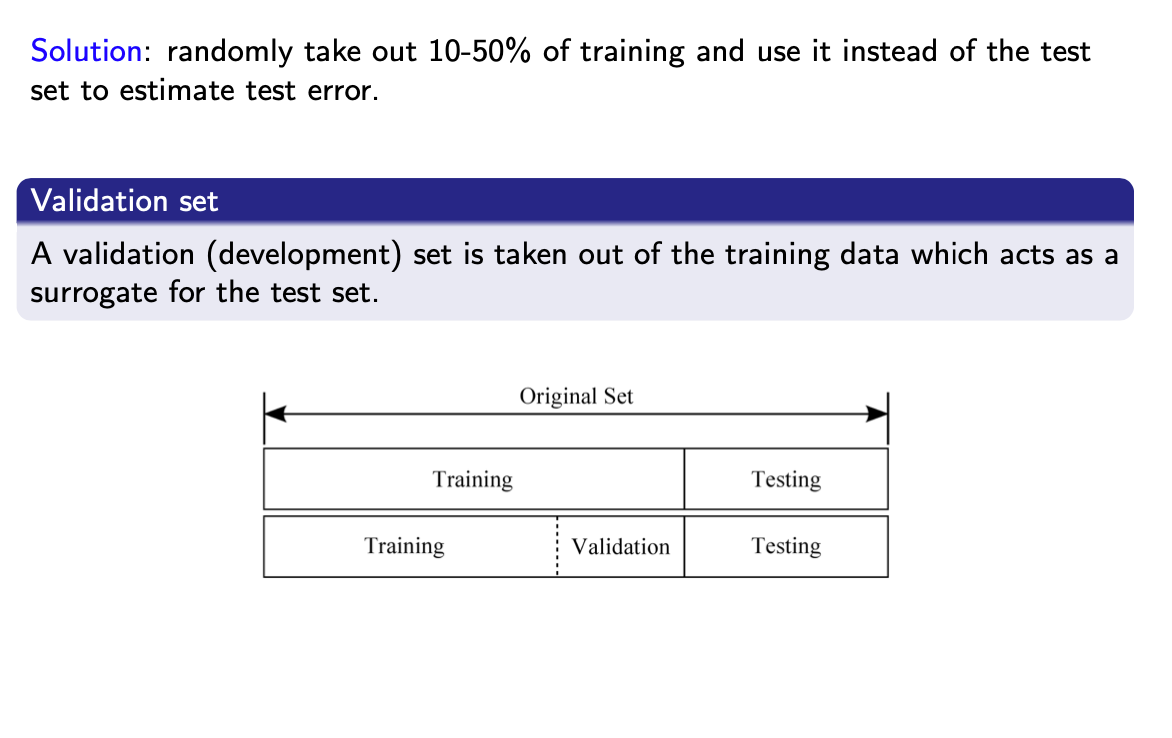

We can create a validation set by simply using the train_test_split function twice. The first time it will create two sets of data (train and test). The second time we will use the same function to create another set from the test set (validation and test).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=.5)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=0, train_size=.5)

### Task: write code that tries values of k between 1 and 50 with kNN, and reports the best value of k, along with the associated accuracy, on the validation set.

In [ ]:
best_k = None
highest_acc = 0

# your code here

print("best value of k is %i with an accuracy of %f on the validation set: " % (best_k, highest_acc))


How well does this work on the test set?

In [ ]:
# your code here
print("The accuracy on the test set when we tuned the hyperparameter on the validation set is %f.3" % val_tuned_test_acc)

When you compare the perfomance of tuning the model on the validation set with the performance of turning the model on the training set, you may see that the latter performs better. This contradicts the whole idea of using a validation set in the first place. What is happening here?

Recall that in order to properly tune our model, we created a validation set from the test set. This means that the data we have tested each of our models on is different and thus the accuracy shouldn't be compared.

So, for fair experimentation, we should test our model on the same data as the other model.


### Task: write code that calculates the performance of kNN, using the value of k found when you tuned your dataset on the training set, on the *new* test set.

In [ ]:
# your code here

train_tuned_test_acc = accuracy_score(y_test, y_pred)
print("The accuracy on the test set when we tuned the hyperparameter on the training set is %f.3" % train_tuned_test_acc)

After doing so, you should see an improvement in performance.

## Moving Beyond Accuracy

So far we have been comparing the accuracy of the models, but recall that at the start we plotted the frequency of each label, and noticed that one label is more common than the other. We have an imbalanced dataset, and accuracy may not be the best metric to measure performance.

One such metric we discussed was the f1 score, which is the harmonic mean of precision and recall. sklearn has a function called 'classification_report' which can produce a small report of these metrics.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Above we can see the precision, recall, f1-score and support (number of data points) for each class.  In this case the f1 score for predicting the 0 label is quite a bit lower than that of the 1 label. That is also reflected in the precision and recall.

Irregardless of imbalanced datasets, we may often want to look at the precision and recall in tasks where the cost of misclassifications between labels is not equal.

In the case of this dataset, we are predicting if an image contains cancer. In such cases, we may prefer a model that has higher recall over one that has higher precision, or indeed a higher 'accuracy' or f1 score, given that missing cancer in an image (false negatives) could be a worse outcome than mistakenly predicting cancer in an image (false positive).

Another way of looking at this is via a confusion matrix, which is possible to produce with sklearn too.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Above we can see that for column 1 (label 0), 49 instances were correctly predicted as not having cancer (label 0), but 6 instances were mistakenly predicted as not having cancer (false negatives).

We can also see that 81 instances were correctly predicted as having cancer, but there were 7 false positives. 

## Automatic Hyperparameter Optimization

So far we have tried to find the best value of k in knn by looping over a range of possible values of k, and selecting the one which performs best on the validation set. However, what if there are other hyperparameters we want to tune as well. This very quickly becomes a challenging combinatorial problem.

Let's have a look and see what hyperparameters we can set with kNN.

In [ ]:
model.get_params()

kNN is a relatively straight forward algorithm, and if you have a look through the documenration for each of the hyperparameters above, you will see there are only a few that we can meaningifully change.

However, what about a more complex algorithm with many more hyperparameters (e.g., Random Forest, Deep Neural Networks).

Let's have a look at the hyperparameters of a Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.get_params()

Again, have a look at the documentation to see what each of those mean. Though it appears to have a lot more different options (hyperparameters) that we can change. For example, we may reasonably want to find the best n_estimators for the model, the best max_depth, the best max_features, the best min_samples_split, and the criterion for splitting. 

Of course we can write code to do this, similar to how we found the best k with kNN above, but we can also make use of some functions in sklearn to make this easier.

Another weakness of our previous approach was that we had a single validation set for hyperparemter tuning. Recall, we discussed the concept of 'cross validation'.

sklearn wraps both of these up nicely for us. 

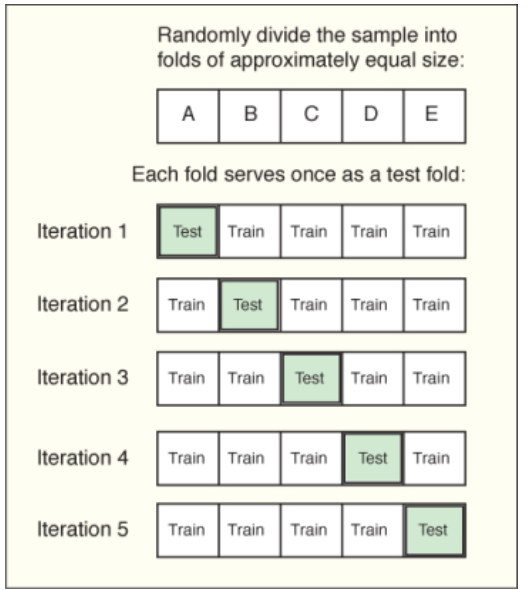

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [
    {"criterion": ["entropy", "gini"], "max_depth": [2, 3, 4, 5, 6, 7, 8 ,9, 10, 15, 20, 25, 30, 50], "min_samples_split": [2, 3, 4, 5]},
]


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size=0.66)

model = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1', cv=5)
model.fit(x_train, y_train)

print("The best hyperparameters found on validation set are %s: " % model.best_params_)

If you have made it this far, you may have waited for the Grid Search CV above to complete. If so, you have a lot of patience given the small size of the dataset. It took a while. This is because a grid search exhaustively tries all combinations of hyperparameter values. Oh, and because we use cross validation, we do it many times on each split of the data. Consider how long this will take on a dataset larger than the very small dataset we are using now.

Thankfully there are other approaches for this which are a little more practical. One such approach is a 'randomized' version of above involving sampling from a distribution over possible parameter values. You may not find the optimal set of hyperparameters, but you won't have to wait so long to find (hopefully) good ones.

### Task: do the same as above, but this time using a Randomized Search.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters = [
    {"criterion": ["entropy", "gini"], "max_depth": [2, 3, 4, 5, 6, 7, 8 ,9, 10, 15, 20, 25, 30, 50], "min_samples_split": [2, 3, 4, 5]},
]


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size=0.66)

model = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1', cv=5)
model.fit(x_train, y_train)

print("The best hyperparameters found on validation set are %s: " % model.best_params_)

You can access the best model found during the search via best_estimator_. This has been done below. Use this model to train on the training set, and produce the f1 score from the test set as 'tuned_model_f1'.

In [ ]:
tuned_model = model.best_estimator_
# your code here

## Baselines

OK, by now we have found a good model and we have fairly found a set of hyperparameters for it, and we have what looks like good performance on a number of metrics.

Usually, though, that's not enough. Instead we need to compare our model with several others in order to place the performance in context.

### Task: use sklearns 'dummy classifiers' to create a set of baselines. Implement each one and compare the performances. You can change the type of baseline by changing the 'strategy' parameter. 

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier

In [ ]:
# your code here



You should see that the baselines perform pretty well, but the tuned model performs a lot better!